<div style="font-family: 'Open Sans'; font-size: 36px; color: #006400; font-weight: bold; text-align: center; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='#006400'">
    NextGen Learners Machine Learning Week-1 Assignment
  </span>
</div>


****Name: Mudasir (NextGen Intern)****

****Date: 1st July, 2025****

****Assignment submitted on: nextgenlearners.official@gmail.com****

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-1: Regression – Predict House Prices
  </span>
</div>


In this task, you'll use the California Housing dataset from “sklearn.datasets” to predict median house prices based on features like house age, rooms, and location. You'll train a Linear Regression model using scikit-learn, then evaluate it using Mean Squared Error (MSE) and R² Score to measure prediction accuracy.

In [1]:
# Import all important libraries

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['MedHouseValue'] = data.target

# View the first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Select only the required features [House age, rooms and location]

# House age: 'HouseAge'
# House rooms: 'AveRooms'
# House Locations: 'Latitude' and 'Longitude'

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

X = X[['HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
X['AveRooms'] = np.floor(X['AveRooms'])
X

,HouseAge,AveRooms,Latitude,Longitude
0,41.0,6.0,37.88,-122.23
1,21.0,6.0,37.86,-122.22
2,52.0,8.0,37.85,-122.24
3,52.0,5.0,37.85,-122.25
4,52.0,6.0,37.85,-122.25
...,...,...,...,...
20635,25.0,5.0,39.48,-121.09
20636,18.0,6.0,39.49,-121.21
20637,17.0,5.0,39.43,-121.22
20638,18.0,5.0,39.43,-121.32


In [8]:
# Split into train and test sets [80:20]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Linear Regression using HouseAge, AveRooms, Latitude, Longitude:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression using HouseAge, AveRooms, Latitude, Longitude:
Mean Squared Error (MSE): 0.9219
R² Score: 0.2965


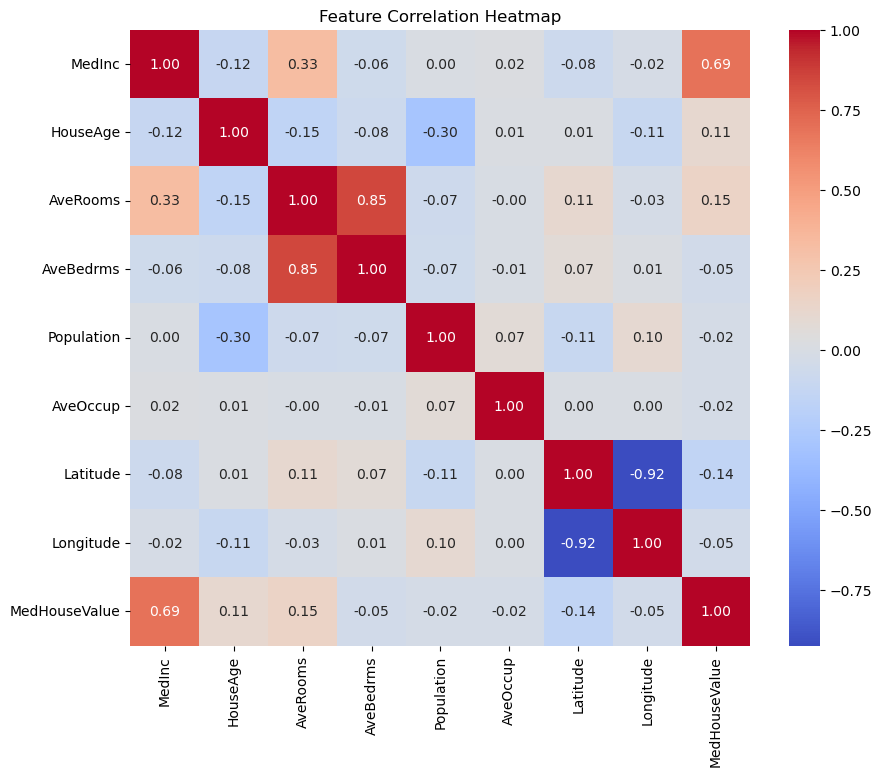

In [12]:
# Visualizations 

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

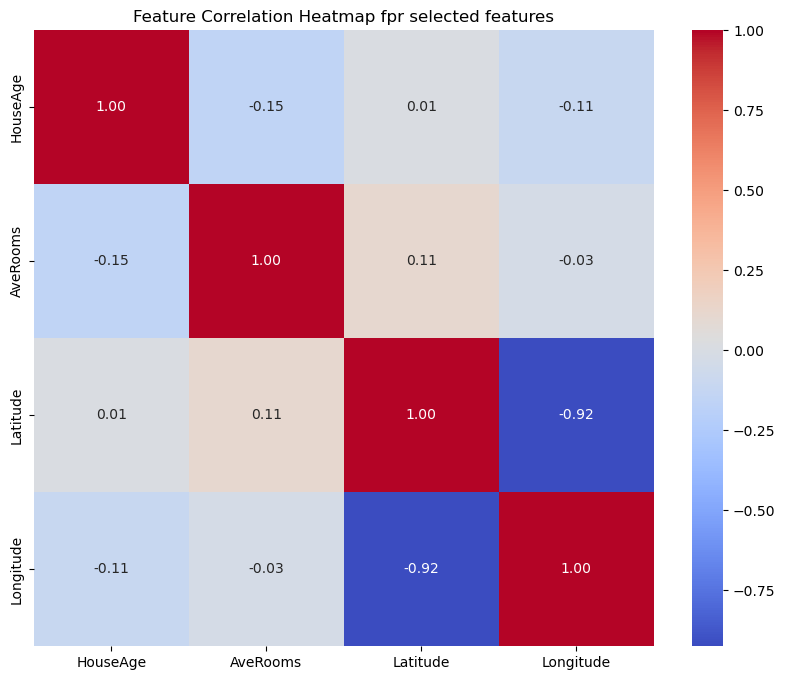

In [13]:
# 2) Correlation heatmap for selected features

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap fpr selected features")
plt.show()

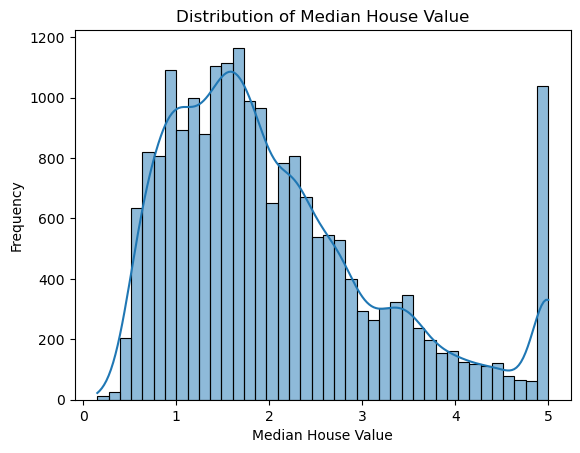

In [15]:
# 3) Distribution of Target (House Value)

sns.histplot(df['MedHouseValue'], bins=40, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

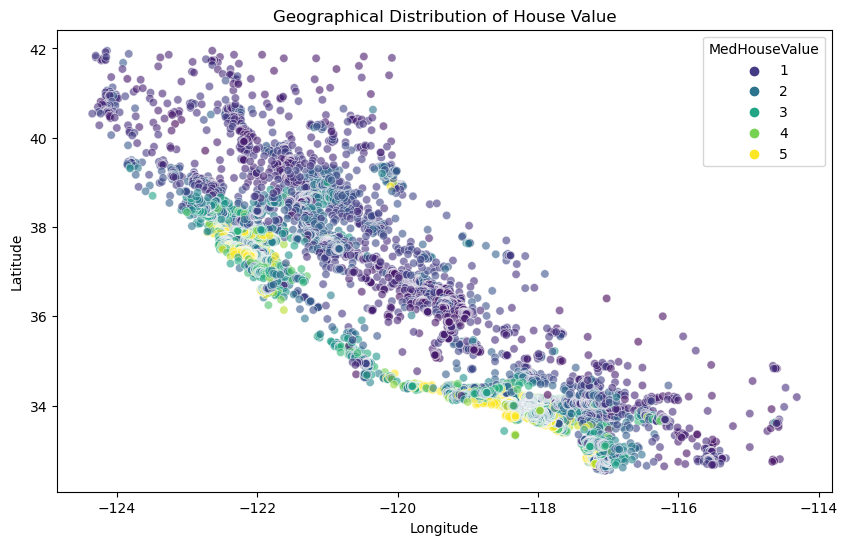

In [18]:
# 4) Geographical Distribution of House Value

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseValue', data=df, palette='viridis', alpha=0.6)
plt.title("Geographical Distribution of House Value")
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Task-2:  Classification – Predict Survival on the Titanic 
  </span>
</div>


In this task, you'll work with the Titanic dataset from Kaggle or GitHub to predict passenger survival. You'll start by cleaning the data—handling missing values using .fillna() or .dropna(), and encoding text columns into numbers. Then, you'll train a Decision Tree Classifier using scikitlearn and evaluate its performance using accuracy and a confusion matrix to understand how well the model predicts survival outcomes. 
Summer 

In [19]:
# Import all necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Read csv file

data = pd.read_csv('Titanic_dataset_2025.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Accuracy: 0.7821
Confusion Matrix:
[[83 22]
 [17 57]]


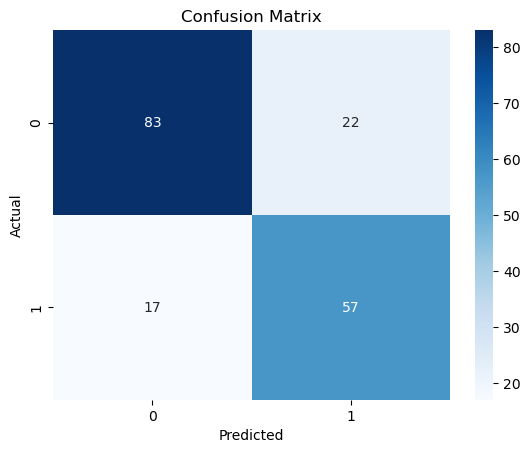

In [30]:
# Select relevant columns and make an explicit copy
df = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# Fill missing values (no warning now)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
le1 = LabelEncoder()
df['Sex'] = le1.fit_transform(df['Sex'])

le2 = LabelEncoder()
df['Embarked'] = le2.fit_transform(df['Embarked'])

# Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# Optional: Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

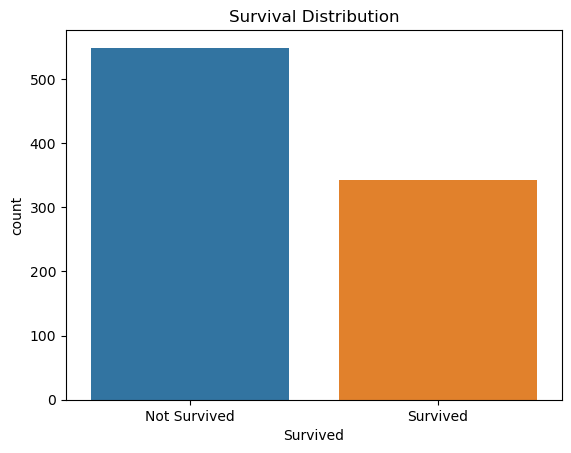

In [31]:
# Visualizations

# 1)Survival Count Plot

sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

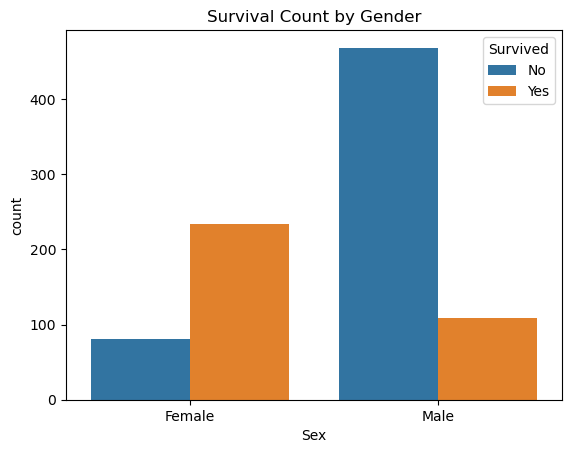

In [32]:
# 2) Survival by Sex

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

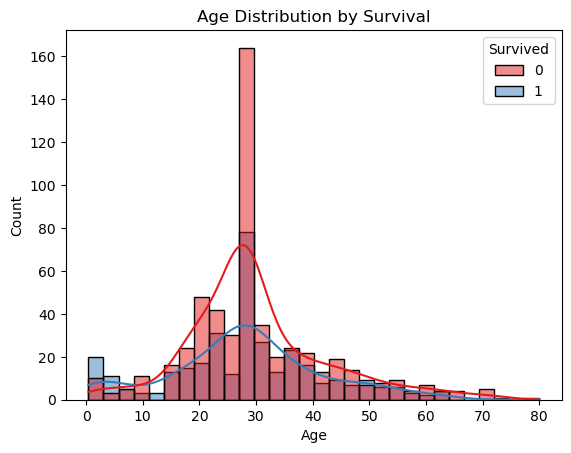

In [33]:
# 4) Age Distribution with Survival Overlay

sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette='Set1')
plt.title("Age Distribution by Survival")
plt.show()

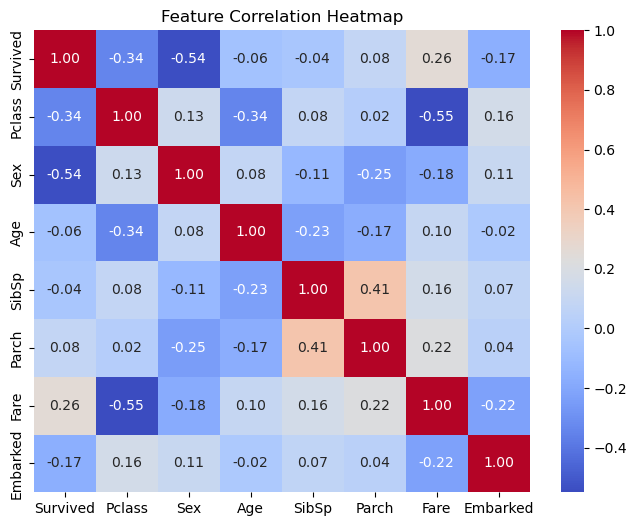

In [34]:
# 5) Heatmap of Feature Correlation

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Explanation for both tasks
  </span>
</div>


*****Task1: Housing Price Prediction – Linear Regression*****

In this task, the California Housing dataset was used to predict median house prices based on selected features like house age, average rooms, latitude, and longitude. The dataset was first loaded and explored, and unnecessary features were removed to focus on the relevant ones. A Linear Regression model was then trained using scikit-learn, after splitting the data into training and testing sets. The model’s performance was evaluated using Mean Squared Error (MSE) and R² Score, which indicated how well the predictions matched the actual values. Data visualization techniques like correlation heatmaps, distribution plots, and scatter plots were also used to better understand feature relationships and geographical patterns of house values. This approach demonstrated how linear models can effectively capture relationships in real estate data.

*****Task2: Titanic Survival Prediction – Decision Tree Classifier*****

In this task, the Titanic dataset was used to build a classification model that predicts whether a passenger survived or not. The dataset underwent preprocessing steps including handling missing values (e.g., filling missing ages with median), and converting categorical variables like gender and embarkation port into numerical form using label encoding. A Decision Tree Classifier was trained on the cleaned dataset to learn survival patterns based on features such as age, gender, passenger class, and fare. Model performance was evaluated using accuracy and a confusion matrix to assess prediction correctness. Several visualizations were created—such as survival counts by gender and class, age distributions, and correlation heatmaps—to analyze survival trends and feature importance. This task highlighted the usefulness of decision trees in classification problems involving categorical and numerical data.